In [27]:
import pandas as pd
import numpy as np

In [28]:
song_data = pd.read_csv("Train_data.csv")

In [29]:
song_data.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


In [30]:
#Checking for NULL Values in the data
song_data.isna().sum()

id                  0
acousticness        0
danceability        0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
duration-min        0
popularity          0
dtype: int64

In [31]:
#Getting Additional Details on the data

song_data.describe()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min
count,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000
mean,8094.034350,0.430578,0.556353,0.522129,0.149321,5.205202,0.201365,-10.668687,0.097680,118.167495,0.525300,1984.517298,3.888133
std,4690.929822,0.366893,0.175373,0.262482,0.297954,3.526954,0.173987,5.506888,0.155895,30.200064,0.258205,25.911998,2.383133
min,1.000000,0.000001,0.000000,0.000020,0.000000,0.000000,0.014700,-43.738000,0.000000,0.000000,0.000000,1920.000000,0.200000
25%,4026.000000,0.058950,0.438000,0.303000,0.000000,2.000000,0.096200,-13.656000,0.034700,95.050500,0.321000,1966.000000,2.900000
50%,8093.000000,0.354000,0.569000,0.534000,0.000115,5.000000,0.132000,-9.584000,0.045600,116.915000,0.532000,1987.000000,3.600000
75%,12180.000000,0.805000,0.685000,0.739000,0.055650,8.000000,0.252000,-6.571500,0.078900,136.108500,0.737000,2008.000000,4.400000
max,16227.000000,0.996000,0.980000,1.000000,1.000000,11.000000,0.997000,1.006000,0.968000,216.843000,1.000000,2021.000000,72.800000


In [32]:
#Visualizing Few Insights of the Data

import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:xlabel='popularity', ylabel='Count'>

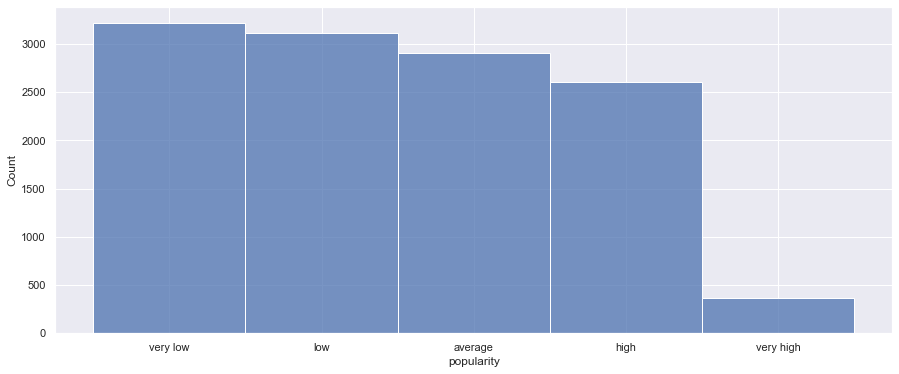

In [33]:
#Checking for the target label - The output labels in the train dataset looks imbalanced

sns.histplot(data = song_data['popularity'])

<AxesSubplot:xlabel='year', ylabel='Density'>

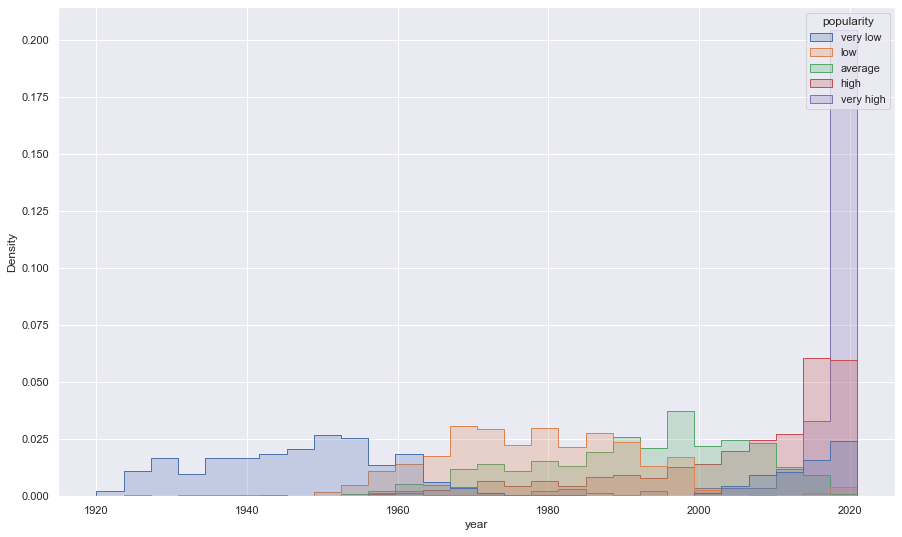

In [34]:
#Checking the popularity variation over the years
#Looks like lot of very high popularity songs are concentrated in the recent years

sns.set(rc = {'figure.figsize':(15,9)})

sns.histplot(data = song_data, x = 'year', hue = 'popularity', 
             stat = 'density', common_norm=False, element = 'step')

In [35]:
song_data['month'] = pd.DatetimeIndex(song_data['release_date']).month
song_data['month_name'] = pd.DatetimeIndex(song_data['release_date']).month_name()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13-11-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '30-04-1974' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13-11-1942' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16-09-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15-05-1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '27-06-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14-03-1983' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '31-08-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

<AxesSubplot:xlabel='month_name', ylabel='Density'>

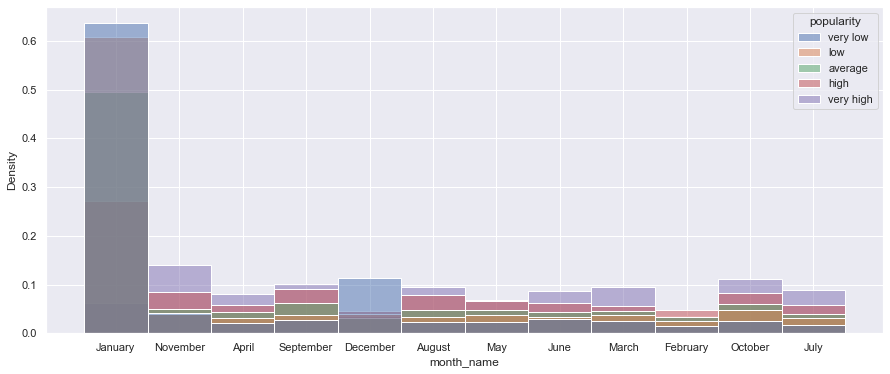

In [36]:
#Getting an idea of the month of popular songs

sns.set(rc = {'figure.figsize':(15,6)})

sns.histplot(data = song_data, x = 'month_name', hue = 'popularity',
            common_norm=False, stat = 'density')

In [37]:
#Creating various bins for the year
#'year<=1960', 'year<=1980', 'year<=2000', 'year<=2010','year<=2020'


song_data['year<=1960'] = song_data['year'].apply(lambda x : 0 if x <= 1960 else 1)
song_data['year<=1980'] = song_data['year'].apply(lambda x : 0 if x <= 1980 else 1)
song_data['year<=2000'] = song_data['year'].apply(lambda x : 0 if x <= 2000 else 1)
song_data['year<=2010'] = song_data['year'].apply(lambda x : 0 if x <= 2010 else 1)
song_data['year<=2020'] = song_data['year'].apply(lambda x : 0 if x <= 2020 else 1)

In [38]:
song_data['explicit'] = song_data['explicit'].apply(lambda x: 0 if x == "No" else 1)
song_data['mode'] = song_data['mode'].apply(lambda m: 1 if m == "Major" else 0)

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
song_data['popularity'] = label_encoder.fit_transform(y = song_data['popularity'])

In [42]:
song_data.columns

Index(['id', 'acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'release_date', 'speechiness', 'tempo', 'valence', 'year',
       'duration-min', 'popularity', 'month', 'month_name', 'year<=1960',
       'year<=1980', 'year<=2000', 'year<=2010', 'year<=2020'],
      dtype='object')

In [43]:
song_data_filtered = song_data.drop(["id","year","month_name","release_date"], axis = 1)

In [44]:
song_data.columns

Index(['id', 'acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'release_date', 'speechiness', 'tempo', 'valence', 'year',
       'duration-min', 'popularity', 'month', 'month_name', 'year<=1960',
       'year<=1980', 'year<=2000', 'year<=2010', 'year<=2020'],
      dtype='object')

In [45]:
song_data_filtered.head(50)

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,duration-min,popularity,month,year<=1960,year<=1980,year<=2000,year<=2010,year<=2020
0,0.949000,0.235,0.0276,0,0.927000,5,0.5130,-27.398,1,0.0381,110.838,0.0398,3.0,4,1,0,0,0,0,0
1,0.855000,0.456,0.4850,0,0.088400,4,0.1510,-10.046,1,0.0437,152.066,0.8590,2.4,2,11,1,1,1,1,0
2,0.827000,0.495,0.4990,0,0.000000,0,0.4010,-8.009,0,0.0474,108.004,0.7090,2.6,4,1,0,0,0,0,0
3,0.654000,0.643,0.4690,0,0.108000,7,0.2180,-15.917,1,0.0368,83.636,0.9640,2.4,2,4,1,0,0,0,0
4,0.738000,0.705,0.3110,0,0.000000,5,0.3220,-12.344,1,0.0488,117.260,0.7850,3.4,0,1,1,0,0,0,0
5,0.898000,0.498,0.4420,0,0.003190,10,0.0974,-9.481,1,0.0337,109.619,0.3550,2.6,2,1,1,0,0,0,0
6,0.259000,0.620,0.7580,0,0.001320,5,0.4160,-8.183,1,0.0343,119.258,0.9120,2.4,4,11,0,0,0,0,0
7,0.124000,0.879,0.6280,1,0.000000,1,0.0661,-6.668,0,0.2640,150.105,0.7210,3.5,0,1,1,1,1,0,0
8,0.149000,0.697,0.1840,1,0.000000,2,0.0763,-23.303,0,0.9330,133.997,0.6130,1.6,4,1,0,0,0,0,0
9,0.470000,0.587,0.5660,0,0.000000,9,0.0644,-9.932,1,0.0276,76.054,0.5290,7.7,1,1,1,1,0,0,0


In [55]:
test_data = song_data_filtered["popularity"]
train_data = song_data_filtered.drop(["popularity"], axis = 1)

In [56]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train, Y_test = train_test_split(train_data, test_data, test_size=0.2, random_state=20)

In [57]:
X_train

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,duration-min,month,year<=1960,year<=1980,year<=2000,year<=2010,year<=2020
9761,0.04470,0.783,0.546,0,0.000000,0,0.5880,-8.248,1,0.0407,136.375,0.766,5.9,3,1,1,0,0,0
5110,0.37200,0.617,0.655,0,0.012400,0,0.2530,-9.951,1,0.0323,122.542,0.727,4.1,1,1,0,0,0,0
10453,0.84900,0.632,0.263,0,0.000000,5,0.3530,-11.066,1,0.0659,118.841,0.539,2.5,1,0,0,0,0,0
1408,0.58300,0.656,0.775,0,0.000000,2,0.3440,-8.005,1,0.0511,134.692,0.836,3.7,1,1,1,0,0,0
1325,0.16100,0.742,0.649,0,0.000000,9,0.0449,-6.568,1,0.0811,153.983,0.903,4.0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9620,0.00329,0.877,0.424,1,0.000000,2,0.0929,-8.383,1,0.0863,150.046,0.116,2.5,4,1,1,1,1,0
7068,0.01650,0.526,0.873,0,0.000025,7,0.0427,-5.023,1,0.0370,149.273,0.919,2.0,8,1,0,0,0,0
7391,0.00898,0.452,0.782,0,0.000098,7,0.1840,-13.895,1,0.0389,175.474,0.581,4.6,1,1,1,0,0,0
4367,0.19400,0.215,0.954,0,0.000009,2,0.9840,-11.740,1,0.2950,149.164,0.146,3.2,10,1,1,0,0,0


In [58]:
Y_train

9761     2
5110     2
10453    4
1408     2
1325     0
        ..
9620     1
7068     4
7391     2
4367     2
10714    1
Name: popularity, Length: 9781, dtype: int32

In [86]:
#Running Models on the data

from sklearn.metrics import f1_score

# Multinomial Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(multi_class='multinomial', solver = 'sag', max_iter=5000)
model1.fit(X_train,Y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial', solver='sag')

In [88]:
y_pred = model1.predict(X_test)

In [89]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.60


In [90]:
f1_score(Y_test, y_pred, average=None).mean()

0.48868821935142276